# Basic Statistics (Part 1)

**Prerequisite:**
- None


**We will learn:**

- Random variable (RV), how to generate random numbers in $\texttt{python}$
- Probability distribution function (PDF)
- Histograms
- Basic statistics (mean, median, standard deviation)


**We will use them to understand**
- Detectors and astronomical images (see Lecture xx)
- Calibration frames: bias, flat field, dark

A good reference: [A Beginner Guide to Astro-Statistics and Astro-Machine-Learning, by Yuan-Sen Ting](https://computeastro.streamlit.app/)

In [125]:
# Let's start with importing our packages
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

## 1. Random variable, histogram, probability

Let's look at a cubic die with faces numbered from 1 to 6. When you roll a die once, you write down the number on the top (e.g., 4). Then when you roll it again, you might see a different number (e.g., 2). You can repeat this many times, and you will probably see all six numbers. An event such as a die roll is called a **random event**. The outcome of a die roll is a **random variable**. Let's denote the random variable of a die roll as $X$, so the value of $X$ must be in $\{1, 2, 3, 4, 5, 6\}$. One must realize that a random variable is a variable -- it can have different values $x$ when repeating the random event. 


Let's use Python to generate random numbers to get a sense of rolling a "fair" die. `np.random.randint` (or `scipy.stats.randint`) provides a nice function to generate a random variable that is an integer between 1 and 6.

In [4]:
# run this cell many times, as if you are rolling a die
print(np.random.randint(low=1, high=6+1)) # notice that `high` is one plus the highest number of our random variable. This trick is common in python.

2


Now you see what a random variable looks like. Shall we roll a die for 100 times and record all the outcomes?

In [5]:
N_roll = 100
outcomes = []
for i in range(N_roll): # do the following operation for 100 times
    outcomes.append(np.random.randint(low=1, high=6+1))
outcomes = np.array(outcomes)

In [6]:
print(outcomes)

[2 6 5 6 3 5 5 6 5 1 3 6 3 6 5 4 1 1 5 6 3 4 6 4 3 1 1 2 1 1 4 1 4 6 2 4 4
 3 3 3 5 4 1 2 2 2 4 1 6 6 5 2 6 5 1 4 6 1 5 2 2 2 4 5 2 2 4 6 3 6 6 3 5 3
 6 2 3 2 4 5 4 3 6 3 4 1 1 6 5 3 1 1 2 1 6 1 4 3 3 5]


Here we use a list `outcomes` to store the outcome from each roll. The `for` loop is used to repeat the die roll for `N_roll` times. It is a good practice to define variables like `N_roll` in your code, because if you want to change the number of dice rolls to 10000, you can just change `N_roll = 10000` without touching other code. The benefit of this practice will manifest itself as we go on in this course. Also, it is usually more convenient to work with numpy arrays than python lists. 

Our next task is to check the frequency of the outcome being each number between 1 and 6. 

In [7]:
np.sum(outcomes == 1) # this shows the frequency of "1" in the 100 rolls

18

In [8]:
np.sum(outcomes == 4) # this shows the frequency of "4" in the 100 rolls

16

In [9]:
# Let's use the for loop again
for i in range(1, 6+1):
    print(f'The frequency of {i} is', np.sum(outcomes == i))

The frequency of 1 is 18
The frequency of 2 is 15
The frequency of 3 is 17
The frequency of 4 is 16
The frequency of 5 is 15
The frequency of 6 is 19


Again, `numpy` provides shortcut functions to do this:

In [10]:
values, counts = np.unique(outcomes, return_counts=True)
print(values, counts)
print(list(zip(values, counts)))

[1 2 3 4 5 6] [18 15 17 16 15 19]
[(1, 18), (2, 15), (3, 17), (4, 16), (5, 15), (6, 19)]


Histogram is a good tool to visualize this result

Text(0.5, 1.0, 'Number of rolls: 100')

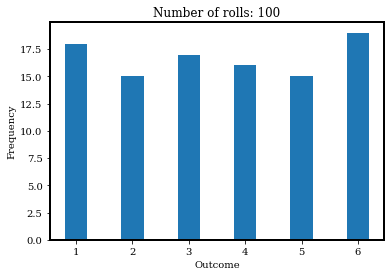

In [11]:
plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Number of rolls: {N_roll}');

Is the die fair? Seems no from the figure above, because the frequencies of all numbers are not the same. This contradicts our assumption of using `np.random.randint` where the random variable should be random. What's happening here?

Let's increase `N_roll` to 10000:

[1 2 3 4 5 6] [1673 1645 1666 1701 1667 1648]


Text(0.5, 1.0, 'Number of rolls: 10000')

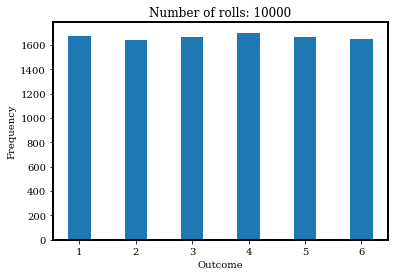

In [12]:
N_roll = 10000

outcomes = []
for i in range(N_roll): # do the following operation for 100 times
    outcomes.append(np.random.randint(low=1, high=6+1))
outcomes = np.array(outcomes)

values, counts = np.unique(outcomes, return_counts=True)
print(values, counts)

plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4)
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title(f'Number of rolls: {N_roll}');

Okay! Now the histogram looks much fairer! This exercise shows us an important thing: the conclusion is often subject to statistical uncertainty when the sample size is too small.

Let's calculate the chance of the outcome being each number:

In [13]:
chances = counts / N_roll
print(chances)

[0.1673 0.1645 0.1666 0.1701 0.1667 0.1648]


If the die is fair, the chances should all be 1/6 = 0.1667. In math, this "chance" is referred to as "probability". In `plt.hist` function, you can turn on `density=True` to plot the "normalized frequency" (each frequency divided by the sum of all frequencies, i.e., total number of rolls). The normalized frequencies are very close to the probability 1/6 (red dashed line).

Text(0.5, 1.0, 'Number of rolls: 10000')

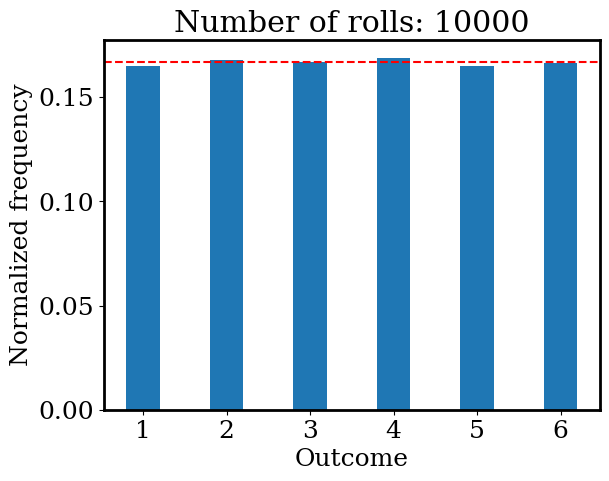

In [121]:
plt.hist(outcomes, bins=np.arange(1, 6+2) - 0.5, histtype='bar', rwidth=0.4, density=True)
plt.axhline(1/6, c='r', ls='--')
plt.xlabel('Outcome')
plt.ylabel('Normalized frequency')
plt.title(f'Number of rolls: {N_roll}');

---

## 2. Mean, Median, Standard Deviation

These are the most useful statistics and are of great importance in astronomical data. If we have a set of data $\{x_1, x_2, \dots, x_{n}\}$, these statistics are defined to be:

- Mean: $\overline{x} = \dfrac{1}{n}(x_1 + x_2 + \cdots + x_n)$

- Median: "the middle number". This is found by ordering all data and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers)

- Standard deviation: it measures how disperse the data is $\sigma = \sqrt{\dfrac{(x_i - \overline{x})^2}{n}}$.

- Variance: it is typically the square of standard deviation, $\sigma^2$. 

(maybe add a footnote to discuss the unbias estimator for sample variance, i.e., N-1 v.s. N)

Let's generate some data by sampling from a **[uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)** from 0 to 1, and calculate their mean, median, and standard deviation.

In [256]:
# sample from a uniform distribution U(0, 1)
n_sample = 200 # sample size
data = np.random.uniform(0, 1, size=(n_sample,))

In [257]:
# Take a look at the data
print(data[:10])

[0.71642085 0.41687534 0.42029791 0.08148121 0.09794359 0.25040116
 0.46779275 0.43859226 0.9087476  0.49309931]


Indeed, they are decimals between 0 and 1. Is there a way to **visualize** their distribution? Yes, we just learned about **histogram**:

```{margin}
If you add ";" to a line of code in Python, it will suppress the output from that code.
```

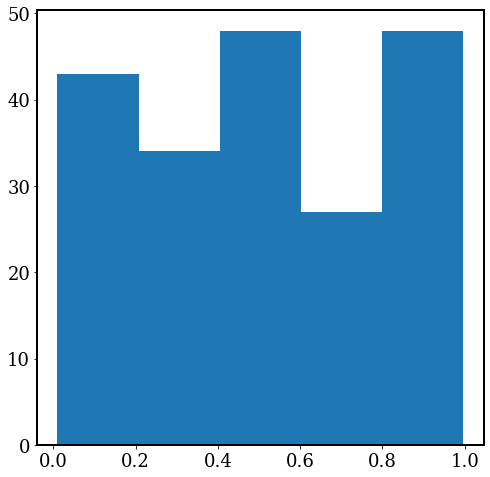

In [261]:
plt.hist(data, bins=5); # indeed, it looks like a uniform distribution

`numpy` provides some handy functions to do basic statistics. 

```{margin}
It is a good practice to check the documentation of the Python function to make sure you're using it properly. In Jupyter notebook/lab, try to type `Shift+Tab` around the function. What happens?
```

In [262]:
np.mean(data), np.median(data), np.std(data)

(0.5062509909025645, 0.49316814898665984, 0.2913167561072133)

To verify that `np.std` does return the standard deviation, we calculate it manually following $\sigma = \sqrt{(x_i - \overline{x})^2/ n}$.

In [263]:
np.sqrt(np.sum((data - np.mean(data))**2 / len(data)))
# Okay, `np.std` does its job pretty well.

0.2913167561072133

From [Wikipedia](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) (you can also calculate by yourselves), the mean, median, and standard deviation of a uniform distribution $U[a, b]$ are $(a+b)/2$, $(a+b)/2$, and $\sqrt{3} (b-a)/ 6$. Do our numerical results agree with these analytical expressions?

### Outlier

An additional data point with a value of 100 (aka outlier) was added to the above data set unknowingly. 

In [264]:
data = np.concatenate([data, [100]])

Let's still calculate mean, median, and standard deviation.

In [265]:
np.mean(data), np.median(data), np.std(data)

(1.0012447670672284, 0.4932369846980653, 7.006297947172848)

Oooops! The mean and standard deviation are completely off, but the median remains similar to what we had above. **An outlier, being unusually small or unusually large, can greatly affect the mean but not affect the median much!** Consider using median if you worry about outliers! We will illustrate this point more when we play with the calibration files. 

---

## 3. Gaussian (normal) distribution

The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is *the* most important distribution in statistics. The probability distribution function (PDF) has a *beautiful* form of
$p(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}},$
where $e=2.71828..$ is the base of natural logarithms, and $\mu$ and $\sigma$ control the centroid and the width (dispersion) of the distribution, respectively. A normal distribution is often written as $\mathcal{N}(\mu, \sigma^2)$. Its PDF has a bell-like shape. 

For a random variable following a normal distribution, its mean is $\mu$ and its standard deviation is $\sigma$. Let's check it by sampling from a standard normal distribution, whose $\mu=0$ and $\sigma=1$. 

In [22]:
n_sample = 10000 # sample size
mu, sigma = 0, 1 # standard normal distribution
data = np.random.normal(loc=mu, scale=sigma, size=(n_sample))

In [24]:
data.shape

(10000,)

In [30]:
np.mean(data), np.median(data), np.std(data)
# Indeed, the mean and median of this data is very close to 0. 
# The standard deviation is very close to 1. 

(-0.00738274193878659, -0.002666996829492176, 0.9949854647963999)

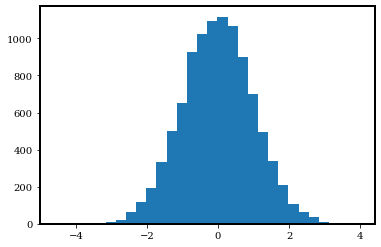

In [28]:
# Let's visualize it
plt.hist(data, bins=30);

From this histogram, we indeed see that the distribution is centered at 0 and has a bell-like shape. More importantly, we see that most data points fall within $[-3, 3]$. Let's try to count how many data points are outside of $[-3, 3]$. This is equivalent to asking how many data points are $>3$ away from the mean $\mu=0$.

In [32]:
np.sum(np.abs(data) > 3)

17

```{margin}
Here I'm using `f-string` to format a string in python. See [here](https://realpython.com/python-f-strings/) for more information. 
```

In [36]:
fraction = np.sum(np.abs(data) > 3) / len(data)
print(f'Only {fraction * 100}% of the data points are outside of [-3, 3].')

Only 0.16999999999999998% of the data points are outside of [-3, 3].


More generally speaking, for a random variable following a normal distribution $\mathcal{N}(\mu, \sigma^2)$, the chance of being $3\sigma$ away from the mean value $\mu$ is very very slim (rigorously speaking, $P(|x-\mu|>3\sigma) = 0.0027$). 

This leads us to the **["68–95–99.7 rule"](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)**, which describes the fact that, for a normal distribution, the percentage of values that lie within $1\sigma$, $2\sigma$, and $3\sigma$ from the mean is 68%, 95%, and 99.7%. 

$$
P(-1\sigma < x-\mu < 1\sigma) = 0.68,\quad P(-2\sigma < x-\mu < 2\sigma) = 0.95,\quad P(-3\sigma < x-\mu < 3\sigma) = 0.997
$$

It is useful to remember these three numbers.


---

## 4. Poisson distribution and its relation to Gaussian

Named after the French mathematician Siméon Denis Poisson (Poisson in French means fish 🐟), a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) describes the probability of a given number of events occurring in a fixed interval of time if these events occur with a known constant mean rate. Because now the probability is a function the "number" of events, the Poisson distribution is a discrete distribution -- the values sampled from a Poisson distribution are all positive integers. 

The PDF of a Poisson distribution is 
$
P(X=k) = \dfrac{\lambda^k e^{-\lambda}}{k!},
$
where $\lambda$ is the mean event rate, and $!$ is factorial. 

In astronomy, the number of photon that we receive in a certain period of time (say during a 1000s exposure) follows a Poisson distribution. The mean rate of photons from a star is a known constant (it's related to the so-called flux). In the following, let's explore the Poisson distribution by studying the number of observed photons.

In [66]:
# Assume the average number of photon from a star is 10 during a 900s exposure
photon_rate = 4
# We "observe" this star for 500 times. 
# Each time we can count how many photons we get, denoted by $x$. 
# This is equivalent to sampling from a Poisson distribution with $\lambda = 4$
n_exposure = 1000
photon_counts = np.random.poisson(photon_rate, size=(n_exposure,))

In [67]:
photon_counts[:30]

array([3, 0, 4, 5, 3, 5, 2, 3, 5, 7, 4, 4, 2, 3, 4, 8, 4, 2, 3, 6, 9, 1,
       2, 4, 3, 7, 6, 4, 3, 7])

This means we get different numbers of photons in different exposures. How are they distributed?

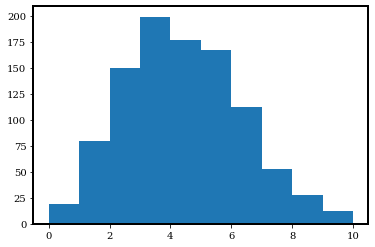

In [74]:
plt.hist(photon_counts, range=(0, 10));

We have several observations from the above figure:

- The distribution does not extend to the negative half of the x-axis. This is because Poisson distribution is only defined for $x>=0$. 
- It does not look like a bell. Instead, the shape is not quite axisymmetric. We call it "skewed". 
- It seems like the number of photons covers a wide range, but is centered around `photon_rate=4`. Let's calculate the mean, median, and variance. 

In [65]:
np.mean(photon_counts), np.median(photon_counts), np.var(photon_counts)

(3.892, 4.0, 3.9283360000000003)

It is striking that the mean, and variance are all very close to the $\lambda=$ `photon_rate` $=4$. Actually, for a Poisson distribution, its mean and variance are indeed $\lambda$. So the standard deviation is $\sqrt{\lambda}$. That means a Poission distribution with a larger $\lambda$ is also "wider" or "more dispersed". 

Now let's move to the bright side: assume the photon rate is very large, `photon_rate=2000`. And we take 10000 exposures.

In [118]:
photon_rate = 2000
n_exposure = 10000
photon_counts = np.random.poisson(photon_rate, size=(n_exposure,))

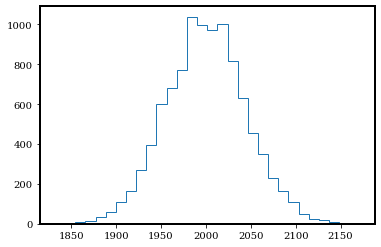

In [119]:
plt.hist(photon_counts, bins=30, histtype='step');

In [120]:
np.mean(photon_counts), np.median(photon_counts), np.var(photon_counts)

(1999.7938, 2000.0, 1997.2740815599996)

Now this Poisson distribution looks a lot more similar to a Gaussian distribution. Let's sample a Gaussian distribution with the same mean (`photon_rate`) and standard deviation (`np.sqrt(photon_rate)`) as this Poisson distribution, and compare. 

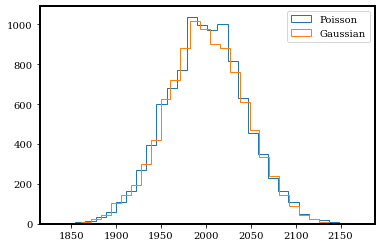

In [121]:
gaussian_data = np.random.normal(photon_rate, np.sqrt(photon_rate), size=(n_exposure,))
plt.hist(photon_counts, bins=30, histtype='step', label='Poisson');
plt.hist(gaussian_data, bins=30, histtype='step', label='Gaussian');
plt.legend();

Yes! They do look very very similar now. **For large $\lambda$, a normal distribution is an excellent approximation to a Poisson distribution.**

---

## 5. Example: A noisy image

Most astronomical data are in the form of image. An image is typically a two-dimentional array. In this section, we will try to simulate an image of a flat object which emits photon at a constant rate (`photon_rate=4`). We will also understand how to possibly reduce the noise in images. 

In [184]:
plt.rcParams['figure.figsize'] = (8, 8)

As we introduced above, each pixel of the image should follow a Poisson distribution with $\lambda=4$. 

In [226]:
# Let's define an image size, e.g., 200 x 200
img_size = 200
photon_rate = 4
img = np.random.poisson(photon_rate, size=(img_size, img_size))

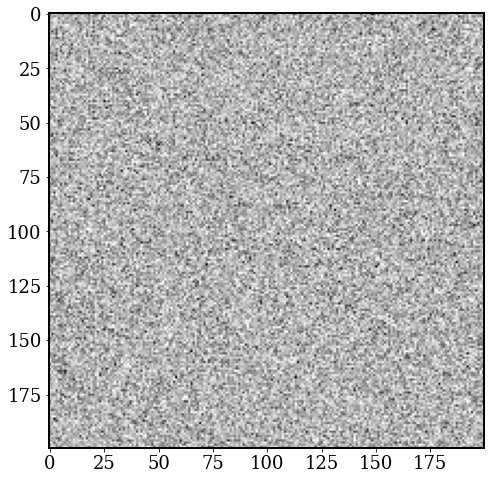

In [227]:
plt.imshow(img, cmap='binary');

This looks like the **"snow screen"** when an old TV has no connection! It is indeed what a noisy image look like! 

It would be interesting to calculate the mean and variance of this noisy image. The function `np.mean` and `np.var` supports high-dimensional data inputs, and you can even calculate the mean or std along a specific axis.

In [228]:
np.mean(img), np.var(img) # nice Poisson distribution

(3.995075, 4.011300744375)

In [229]:
# This calculate the mean for each column of the noisy image
np.mean(img, axis=0)

array([4.19 , 3.96 , 4.075, 4.12 , 3.815, 4.235, 4.165, 4.085, 3.695,
       4.115, 4.005, 3.74 , 3.95 , 4.06 , 4.2  , 4.03 , 3.955, 3.8  ,
       4.26 , 3.695, 4.16 , 3.825, 3.925, 4.13 , 4.09 , 4.   , 3.925,
       3.96 , 3.92 , 4.135, 3.885, 3.975, 4.075, 4.07 , 3.96 , 4.08 ,
       3.97 , 3.88 , 4.045, 3.665, 4.215, 3.865, 3.955, 4.025, 4.11 ,
       4.14 , 4.025, 4.005, 3.955, 4.045, 4.16 , 3.995, 3.7  , 3.805,
       3.735, 4.125, 3.735, 4.275, 4.025, 4.   , 4.015, 3.945, 3.81 ,
       4.105, 3.945, 4.12 , 4.06 , 4.065, 4.22 , 4.03 , 4.14 , 4.135,
       3.85 , 4.14 , 4.15 , 4.12 , 3.84 , 3.955, 4.09 , 4.21 , 3.925,
       4.26 , 4.08 , 3.74 , 4.015, 3.87 , 3.86 , 4.075, 3.85 , 3.89 ,
       3.93 , 3.775, 3.94 , 3.92 , 4.045, 3.76 , 4.01 , 4.1  , 4.135,
       3.895, 3.785, 4.075, 3.85 , 3.95 , 4.08 , 4.165, 4.01 , 3.74 ,
       3.895, 4.215, 4.04 , 3.935, 4.015, 4.01 , 3.845, 3.92 , 3.795,
       4.01 , 3.98 , 3.89 , 4.005, 3.8  , 4.03 , 3.65 , 3.87 , 4.055,
       4.055, 3.835,

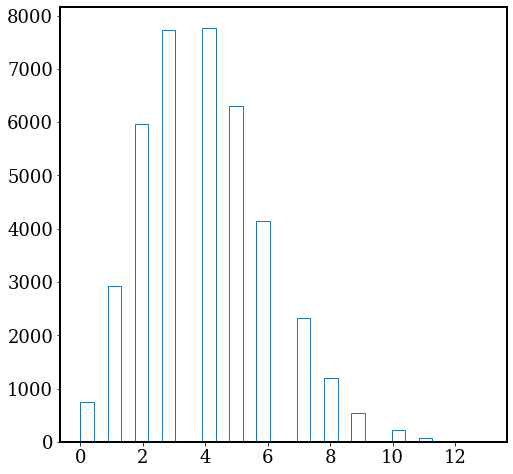

In [230]:
# We can also plot the histogram for the pixel values.
# You need to "flatten" the 2-D image to a 1-D array
plt.hist(img.flatten(), bins=30, histtype='step'); # looks like Poisson

We discuss the concept "signal-to-noise ratio" (S/N, or SNR) here. The signal we want to receive from this image is $\lambda=4$, which is the average photon rate from the object. However, the image is quite noisy. The standard deviation of pixel values is a proxy for how noisy the image is. Therefore, the SNR of this image is:

In [231]:
SNR = np.mean(img) / np.std(img)
print(SNR)

1.994721757261882


In fact, for a Poisson distribution with $\lambda=4$, `mean=4`, `std=2`, so the SNR should just be 2.

SNR=2 is too low for any science. But you might have heard that stacking images will reduce the noise. Why not taking 16 exposures and combining them together?

In [232]:
img_size = 200
photon_rate = 4
img_list = []
for i in range(16):
    img = np.random.poisson(photon_rate, size=(img_size, img_size))
    img_list.append(img)
    
img_list = np.array(img_list)

In [233]:
img_list.shape

(16, 200, 200)

Remember that each pixel follows a Poisson distribution with $\lambda=4$. For a pixel at a given location, it now has 16 different values from 16 exposures. We can calculate the mean or median of these values as a way to "combine" these exposure. This can be done using `np.mean(img_list, axis=0)` or `np.median(img_list, axis=0)`. `axis=0` means we are averaging along the first axis of `img_list`, i.e., averaging over different exposures.

After combining these exposures, we show the combined image using the same scale as the one above.

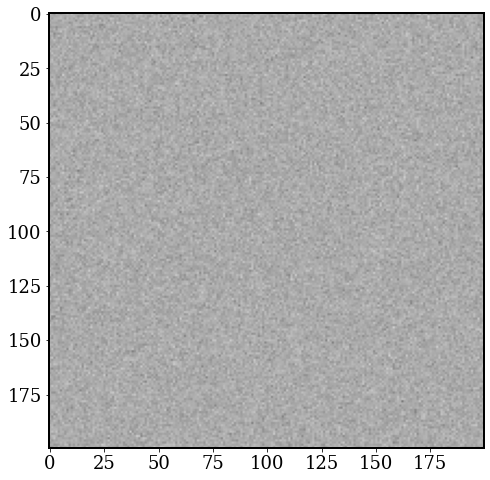

In [234]:
img_avg = np.mean(img_list, axis=0)
plt.imshow(img_avg, cmap='binary', vmin=0, vmax=12);

The combined image is much smoother than a single exposure image! If you increase the number of exposures, the combined image will even smoother. Another way to look at this is to plot the histogram of pixel values:

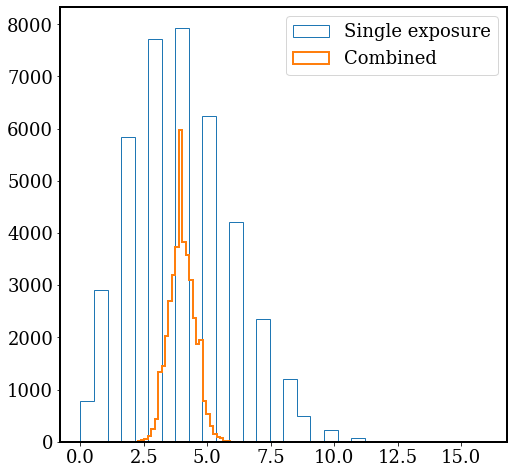

In [235]:
plt.hist(img.flatten(), bins=30, histtype='step', label='Single exposure');
plt.hist(img_avg.flatten(), bins=30, histtype='step', lw=2, label='Combined');
plt.legend();

After combining 16 exposures, the pixel values are much more concentrated around $\lambda=4$ compared with the pixel values of a single exposure. What's the SNR for this combined image? 

In [237]:
SNR_avg = np.mean(img_avg) / np.std(img_avg)
print(SNR_avg)

7.9997134292987955


By combining 16 exposures, we boost the SNR by a factor of 4! Again, an effective way to fight down noise is to combine lots of exposures. More generally, SNR is proportional to $\sqrt{N}$ where $N$ is the number of exposures combined.

## Exercise

Let's revisit the **football** data from last week in order to practice calculating the mean, median, and mode of some distributions.

In [ ]:
# Don't worry about this cell, it's just to make the notebook look a little nicer.
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Get the directory right
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')
  os.chdir('/content/drive/Shareddrives/AST207/data')
else:
    os.chdir('../../../_static/ObsAstroData/')

In [ ]:
# Read the catalog of the football players
cat = Table.read('./players_age.csv')

1. Calculate the **mean**, **median**, and **mode** of the player height (in inches).

In [1]:
## Your answer goes here

2. Are the three numbers different? If so, why? If not, why not?

In [ ]:
## Your answer goes here

3. Make a **histogram** of the player height in the same units. Do your answers make sense?

In [ ]:
## Your answer goes here

4. Calculate the **mean**, **median**, and **mode** of the player age. Again histogram the player age and determine if your answers make sense. 

In [ ]:
## Your answer goes here

5. Extra credit: find **height** and **age** data for typical people in the United States and compare our statistics with those of football players. How can you compare the distributions?

In [ ]:
## Your answer goes here